<a href="https://colab.research.google.com/github/muhammadnaqeeb/AI-Lab-Work/blob/main/Lab_10_Activities_and_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab 10**
# **Genetic Algorithm**
Muhammad Naqeeb

fa20-bcs-012

To: Mr. Qazi Zia

## Activity 1:

Consider maxOne problem where the goal is to arrange a string of L bits into all ones. At first the 
solution may seem trivial i.e., for L=8 the solution is [1, 1, 1, 1, 1, 1, 1, 1]. Despite this we shall see 
how many iterations it will take for an instance of genetic algorithm to find the solution.

In [ ]:
import random
import math

class GA:
   def __init__(self, individualSize, populationSize):
      self.population=dict()
      self. individualSize = individualSize 
      self.populationSize = populationSize 
      self.totalFitness=0
      i=0
      while i < populationSize:
         listOfBits = [0] * individualSize
         listOfLocations = list(range(0,individualSize)) 
         numberOfOnes = random.randint(0, individualSize-1) 
         onesLocations = random.sample(listOfLocations,numberOfOnes) 
         for j in onesLocations:
            listOfBits[j]=1
            self.population[i]=[listOfBits, numberOfOnes] 
            self.totalFitness = self.totalFitness + numberOfOnes 
            i=i+1
            
   def updatePopulationFitness(self):
      self.totalFitness = 0
      for individual in self.population: 
         individualFitness=sum(self.population[individual][0])
         self.population[individual][1] = individualFitness 
         self.totalFitness = self.totalFitness + individualFitness
         
   def selectParents(self):
        rouletteWheel=[]
        wheelSize=self.populationSize*5 
        h_n=[]
        for individual in self.population:
            h_n.append(self.population[individual][1])
        j=0
        for individual in self.population:
            individualLength=round(wheelSize*(h_n[j]/sum(h_n)))
            j=j+1
            if individualLength>0:
                i=0
                while i < individualLength:
                    rouletteWheel.append(individual)
                    i=i+1
        random.shuffle(rouletteWheel)
        parentIndices=[]
        i=0
        while i< self.populationSize: 
            parentIndices.append(rouletteWheel[
                random.randint(0, len(rouletteWheel)-1)])
            i=i+1 
        newGeneration=dict()
        i=0
        while i < self.populationSize:
            newGeneration[i]=self.population[parentIndices[i]].copy()
            i=i+1
        del self.population
        self.population = newGeneration.copy() 
        self.updatePopulationFitness()
        


  #
   def generateChildren(self, crossoverProbability):
      numberOfPairs = round(crossoverProbability*self.populationSize/2) 
      individualIndices = list(range(0,self.populationSize)) 
      random.shuffle(individualIndices)
      i=0
      j=0
      while i<numberOfPairs:
        crossoverPoint=random.randint(0, self. individualSize-1) 
        child1=self.population[j][0][0:crossoverPoint]+self.population[j+1][0][crossoverPoint:] 
        child2=self.population[j+1][0][0:crossoverPoint]+self.population[j][0][crossoverPoint:] 
        self.population[j] = [child1, sum(child1)]
        self.population[j+1] = [child2, sum(child2)]
        i=i+1 
        j=j+2
      self.updatePopulationFitness()


   def mutateChildren(self, mutationProbability):
        numberOfBits = round(mutationProbability* 
                            self.populationSize*self.individualSize) 
        totallndices = list(range(0,self.populationSize*self.individualSize)) 
        random.shuffle(totallndices)
        swapLocations = random.sample(totallndices,numberOfBits)

        for loc in swapLocations:
            individualIndex=math.floor(loc/self.individualSize) 
            bitIndex=math.floor(loc%self.individualSize)

            if self.population[individualIndex][0][bitIndex]==0: 
                self.population[individualIndex][0][bitIndex]=1
            else:
                self.population[individualIndex][0][bitIndex]=0 
        self.updatePopulationFitness()

In [ ]:
individualSize, populationSize = 8, 10
i=0
instance = GA(individualSize,populationSize)
while True:
 instance.selectParents()
 instance.generateChildren(0.8) 
 instance.mutateChildren(0.03)
 print(instance.population)
 print(instance.totalFitness)
 print(i)
 i=i+1
 found=False
 for individual in instance.population:
   if instance.population[individual][1]==individualSize:      
     found=True
     break
 if found:
   break

{0: [[1, 1, 0, 0, 1, 0, 1, 0], 4], 1: [[0, 1, 0, 0, 0, 0, 1, 1], 3], 2: [[1, 1, 0, 0, 1, 0, 1, 1], 5], 3: [[1, 1, 0, 0, 1, 0, 1, 1], 5], 4: [[0, 1, 0, 0, 1, 0, 1, 1], 4], 5: [[1, 1, 0, 0, 0, 0, 1, 0], 3], 6: [[0, 0, 1, 0, 1, 0, 1, 1], 4], 7: [[1, 1, 0, 1, 1, 1, 1, 0], 6], 8: [[0, 1, 0, 0, 1, 0, 1, 1], 4], 9: [[0, 1, 0, 0, 0, 0, 1, 0], 2]}
40
0
{0: [[1, 1, 0, 0, 1, 1, 1, 0], 5], 1: [[1, 1, 0, 1, 1, 0, 1, 1], 6], 2: [[0, 1, 0, 0, 1, 1, 1, 0], 4], 3: [[1, 1, 0, 1, 1, 0, 1, 1], 6], 4: [[1, 1, 0, 1, 1, 1, 1, 1], 7], 5: [[0, 1, 0, 0, 0, 0, 1, 0], 2], 6: [[1, 1, 0, 0, 0, 0, 1, 0], 3], 7: [[0, 1, 0, 0, 0, 0, 1, 0], 2], 8: [[0, 0, 1, 0, 1, 1, 1, 1], 5], 9: [[1, 1, 0, 1, 1, 1, 1, 1], 7]}
47
1
{0: [[1, 1, 0, 1, 1, 1, 1, 1], 7], 1: [[0, 1, 0, 0, 1, 1, 1, 0], 4], 2: [[1, 1, 0, 1, 1, 0, 1, 1], 6], 3: [[1, 1, 0, 1, 1, 1, 1, 1], 7], 4: [[1, 1, 0, 1, 1, 1, 0, 1], 6], 5: [[1, 1, 0, 0, 1, 1, 1, 0], 5], 6: [[1, 1, 0, 0, 1, 1, 1, 0], 5], 7: [[1, 1, 0, 0, 1, 0, 1, 1], 5], 8: [[1, 1, 0, 1, 1, 0, 1, 1], 6], 9

## Graded Lab Task

Imagine an 8 queen problem, where the goal is to place 8 queens on an 8 X 8 board such that no two queens are on the same row or column or diagonal. (Before proceeding, kindly refer to lectures). A sample state is shown below.


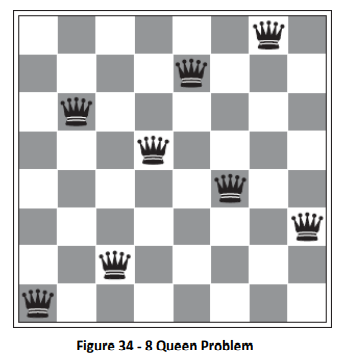

In [ ]:
import random
def view(li, index):
    print()
    print(f"Solution number {index + 1}: ", end='')
    print(li)
    print()

    for i in range(8):
        x = li[i] - 1
        for j in range(8):
            if j == x:
                print('[Q]', end='')
            else:
                print('[ ]', end='')
        print()
    
    print()

def getHuristic(instance):
    huristic = []
    for i in range(len(instance)):
        j = i - 1
        huristic.append(0)
        while j >= 0:
            if instance[i] == instance[j] or (abs(instance[i] - instance[j]) == abs(i - j)):
                huristic[i] += 1
            j -= 1
        j = i + 1
        while j < len(instance):
            if instance[i] == instance[j] or (abs(instance[i] - instance[j]) == abs(i - j)):
                huristic[i] += 1
            j += 1
    return huristic

def getFitness(instance):
    clashes = 0
    for i in range(len(instance) - 1):
        for j in range(i + 1, len(instance)):
            if instance[i] == instance[j]:
                clashes += 1
    for i in range(len(instance) - 1):
        for j in range(i + 1, len(instance)):
            if abs(instance[j] - instance[i]) == abs(j - i):
                clashes += 1
    return 28 - clashes

def buildKid(instance1, instance2, crossOver):
    newInstance = []
    for i in range(crossOver):
        newInstance.append(instance1[random.randint(0, 7)])
    for i in range(crossOver, 8):
        newInstance.append(instance2[random.randint(0, 7)])
    return newInstance

def changeChilds(co):
    global father, mother, child1, child2, crossover
    crossover = co
    child1 = buildKid(father, mother, crossover)
    child2 = buildKid(mother, father, crossover)

def changeChromosome(li):
    global crossover, father, mother
    newchange = -1
    while newchange != 0:
        newchange = 0
        tmpli = li
        getHur = getHuristic(tmpli)
        index = getHur.index(max(getHur))
        maxFitness = getFitness(tmpli)
        for i in range(1, 9):
            tmpli[index] = i
            if getFitness(tmpli) > maxFitness:
                maxFitness = getFitness(tmpli)
                newchange = i
            tmpli = li
        if newchange == 0:
            for i in range(len(li) - 1):
                for j in range(i + 1, len(li)):
                    if li[i] == li[j]:
                        li[j] = random.randint(1, 8)
        else:
            li[index] = newchange

if __name__ == "__main__":
    numberOfSolutions = int(input())
    
    solutions = []
    crossover = 4
    while len(solutions) < numberOfSolutions:
        father = []
        mother = []
        for i in range(8):
            father.append(random.randint(1, 8))
            mother.append(random.randint(1, 8))
        fitnessFather = getFitness(father)
        fitnessMother = getFitness(mother)
        while fitnessFather != 28 and fitnessMother != 28:
            changeChilds(crossover)
            changeChromosome(child1)
            changeChromosome(child2)
            fitnessFather = getFitness(child1)
            fitnessMother = getFitness(child2)
            father = child1
            mother = child2
            print(father)
            print(mother)
        if getFitness(father) == 28:
            if father not in solutions:
                solutions.append(father)
        else:
            if mother not in solutions:
                solutions.append(mother)

    print("----------------------- Solutions -----------------------")
    print(f"The number of solutions you wanted: {numberOfSolutions}")

    for i in range(len(solutions)):
        view(solutions[i], i)

    print("---------------------------------------------------------")

8
[8, 5, 2, 2, 3, 1, 7, 4]
[8, 5, 2, 7, 3, 7, 4, 1]
[5, 7, 4, 1, 8, 1, 3, 2]
[7, 3, 6, 2, 5, 1, 8, 4]
[4, 2, 7, 3, 1, 8, 7, 5]
[8, 1, 6, 2, 6, 7, 3, 8]
[1, 4, 7, 3, 8, 2, 8, 6]
[8, 2, 7, 4, 1, 7, 4, 5]
[8, 7, 3, 7, 2, 4, 1, 6]
[8, 2, 8, 5, 7, 1, 3, 6]
[1, 7, 8, 6, 3, 2, 4, 8]
[8, 6, 3, 5, 2, 4, 1, 7]
[5, 8, 2, 7, 3, 6, 4, 1]
[4, 8, 7, 3, 1, 2, 8, 6]
[8, 4, 1, 3, 5, 2, 7, 6]
[8, 8, 5, 1, 6, 4, 7, 3]
[4, 8, 1, 3, 6, 2, 2, 5]
[7, 5, 2, 8, 6, 3, 8, 1]
[8, 1, 5, 7, 2, 6, 7, 8]
[3, 8, 2, 4, 6, 8, 5, 1]
[7, 3, 8, 1, 1, 3, 6, 2]
[8, 3, 5, 4, 2, 4, 7, 3]
[3, 6, 8, 1, 5, 7, 2, 4]
[3, 8, 4, 6, 1, 5, 2, 8]
[4, 6, 8, 7, 1, 3, 6, 7]
[6, 4, 1, 8, 5, 2, 6, 3]
[2, 8, 5, 7, 1, 3, 6, 4]
[8, 5, 6, 1, 3, 2, 7, 5]
[8, 2, 7, 1, 4, 5, 6, 1]
[1, 3, 5, 7, 2, 8, 3, 6]
[8, 7, 2, 6, 3, 1, 1, 4]
[4, 6, 3, 8, 7, 1, 2, 5]
[6, 8, 1, 7, 5, 3, 4, 7]
[4, 8, 3, 5, 6, 1, 2, 7]
[2, 8, 5, 7, 4, 6, 1, 3]
[8, 6, 1, 5, 4, 8, 1, 7]
[4, 2, 7, 8, 6, 1, 3, 5]
[3, 8, 4, 7, 4, 2, 7, 1]
[6, 4, 1, 5, 8, 2, 4, 7]
[8, 4, 1, 2, 5, 2, 6, 3